In [1]:
filename = 'album_data.csv'

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
from scipy.stats import pareto, gamma
from datetime import date

# read the data
data = pd.read_csv(filename, encoding='utf-16')

In [33]:
# would like to get a histogram of durations here over date added, but only down to the day, so stacking any albums listened to on the same day
# this would give a view of how long per day I listened
# would be cool if bars were colored by genre
# also a nice add would be a running average line overtop for amount of music listened to in last x days

date_added_days = []
for index, item in data.iterrows():
    date_added_days.append(item['date_added'][:-10])

#plt.figure(figsize=(18,10))
#plt.bar(date_added_days, data['duration'])
#pyplot.xticks(visible=False)
#pyplot.xlabel('Date Listened')
#pyplot.ylabel('Duration (ms)')
#pyplot.show()

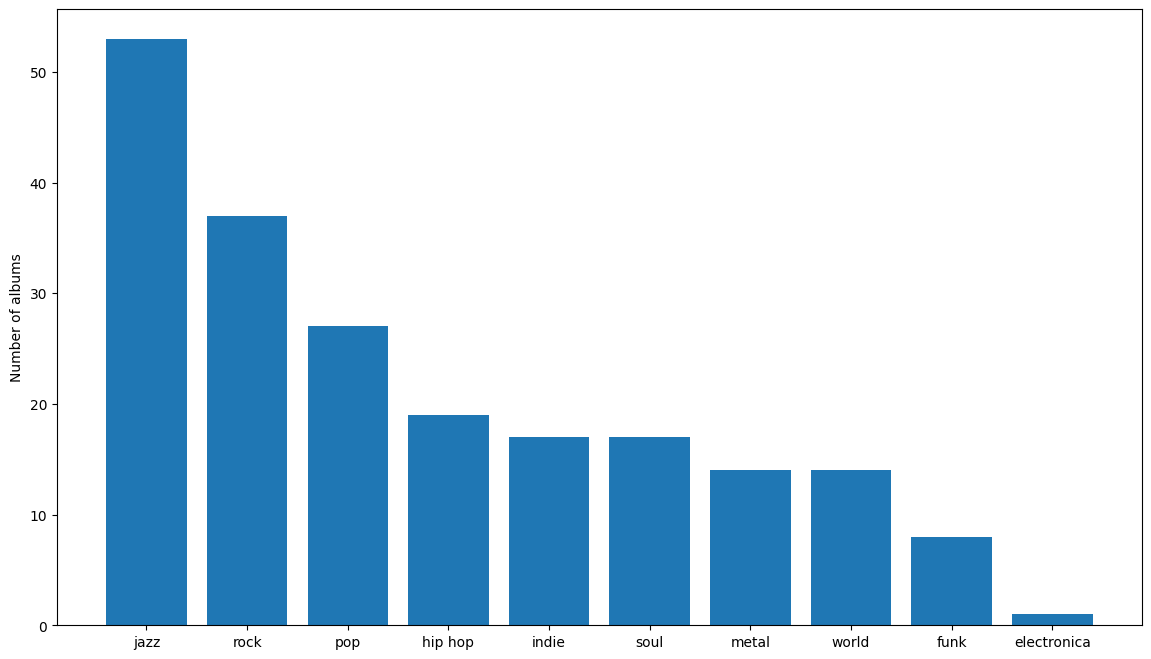

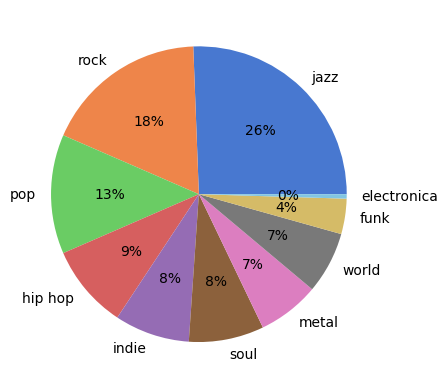

In [2]:
# basic genre graphs here
# start with number of albums per genre

genres=['electronica', 'funk', 'hip hop', 'indie', 'jazz', 'metal', 'pop', 'rock', 'soul', 'world']

num_albums = []
for g in genres:
    num_albums.append(data['overall_genre'].value_counts()[g])

df = pd.DataFrame({'genres': genres, 'quantity': num_albums})
df = df.sort_values('quantity', ascending=False)

plt.figure(figsize=(14,8))
plt.bar(df['genres'], df['quantity'])
plt.ylabel('Number of albums')
plt.show()

palette_color = sns.color_palette('muted')
plt.pie(df['quantity'], labels=df['genres'], colors=palette_color, autopct='%.0f%%')
plt.show()

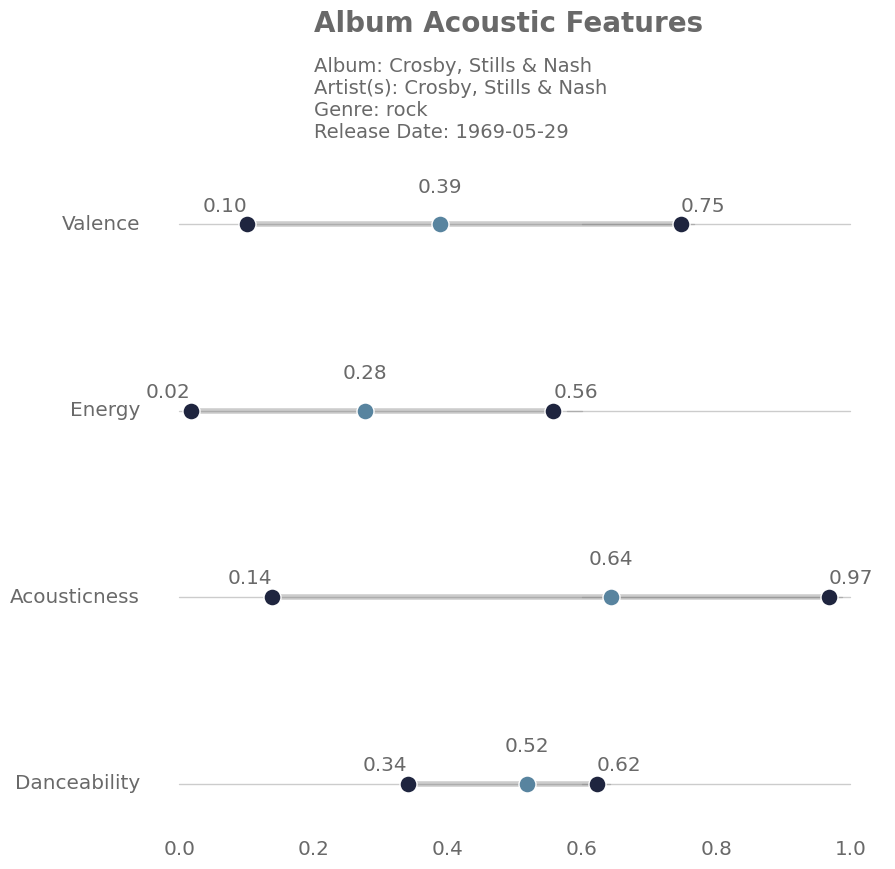

In [64]:
# maybe get a cleveland dot plot going for a given album
# show the normalized spread of acoustic features and overall ranking

vars = ['Danceability', 'Acousticness', 'Energy', 'Valence']
index = 193
row = data.iloc[index]
mins = [row['danceability_min'], row['acousticness_min'], row['energy_min'], row['valence_min']]
maxs = [row['danceability_max'], row['acousticness_max'], row['energy_max'], row['valence_max']]
avgs = [row['danceability_mean'], row['acousticness_mean'], row['energy_mean'], row['valence_mean']]

df = pd.DataFrame({'var':vars, 'min':mins, 'max':maxs, 'avg': avgs})

plt.style.use("seaborn-v0_8-whitegrid") # set style to nice style
fig, ax = plt.subplots(1, 1, figsize=(10, 8),)

# color palette to choose from
darkblue = "#1f253f"
lightblue = "#58849f"

DOT_SIZE = 150

# avg dot
ax.scatter(x=df['avg'], y=df['var'], s=DOT_SIZE, alpha=1, label="Average", color=lightblue, edgecolors="white")
# min and max dots
ax.scatter(x=df['min'], y=df['var'], s=DOT_SIZE, alpha=1, label="Min/Max", color=darkblue, edgecolors="white")
ax.scatter(x=df['max'], y=df['var'], s=DOT_SIZE, alpha=1, label="Min/Max", color=darkblue, edgecolors="white")
# line between min and max vals
ax.hlines(y=df['var'], xmin=df['min'], xmax=df['max'], color="grey", alpha=0.4, lw=4, zorder=0)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# apply text to all
for i in range(0, df.shape[0]):
    ax.text(x=df['avg'][i], y=i + 0.15, s="{:.2f}".format(df['avg'][i]), horizontalalignment="center", verticalalignment="bottom",
                size="x-large", color="dimgrey", weight="medium")
    ax.text(x=df['min'][i], y=i + 0.15, s="{:.2f}".format(df['min'][i]), horizontalalignment="right", verticalalignment="top",
                size="x-large", color="dimgrey", weight="medium")
    ax.text(x=df['max'][i], y=i + 0.15, s="{:.2f}".format(df['max'][i]), horizontalalignment="left", verticalalignment="top",
                size="x-large", color="dimgrey", weight="medium")

    ax.plot([df['max'][i] + 0.02, 0.6], [i, i], linewidth=1, color="grey", alpha=0.4, zorder=0)
    ax.plot(-0.05, [df['min'][i] - 0.02], [i, i], linewidth=1, color="grey", alpha=0.4, zorder=0)

    ax.text(x=-0.059, y=i, s=df['var'][i], horizontalalignment="right", verticalalignment="center", size="x-large", color="dimgrey", weight="normal")

# ticks and guidelines
ax.set_yticks([])
ax.grid(False)  
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis="x", pad=20, labelsize="x-large", labelcolor="dimgrey")

# Add plot title and description
plt_title = "Album Acoustic Features"
plt_desc = (
    f"Album: {row['album_name']}\n"
    f"Artist(s): {row['artists_names']}\n"
    f"Genre: {row['overall_genre']}\n"
    f"Release Date: {row['release_date']}"
)

ax.text(x=0.2, y=3.9, s=plt_desc, horizontalalignment="left", verticalalignment="top", size=14, color="dimgrey", weight="normal", wrap=True)
ax.text(x=0.2, y=4, s=plt_title, horizontalalignment="left", verticalalignment="bottom", size=20, color="dimgrey", weight="semibold")
            
# Show the graph
plt.show()